
# NLP, DS-поток
## Задание 1
### Embeddings. Word2Vec. Conv1D

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---
### Задача 1

В данном домашнем задании вам предлагается проанализировать и улучшить модель для задачи `Sentiment Analysis`, которую вы обучали на семинаре.

Предлагается выполнить следующие пункты:


1. **(20 баллов)** Примените стемминг или лемматизацию к датасету. Как поменялось качество? 

2. **(20 баллов)** Попробуйте изменить размерность эмбеддинга на сильно большую и сильно меньшую. В качестве размеров эмбеддингов можно взять 30 и 200. Как меняется качество модели? Какая модель более склонна к переобучению и почему?

3. **(20 баллов)** Посмотрите на обученнные вами эмбеддинги у модели с маленьким размером эмбеддинга из предыдущего пункта. Для нескольких слов найдите похожие на него по косинусной мере близости. 

5. **(20 баллов)** Попробуйте рассмотреть фильтры меньших размеров.
 * Рассмотрите фильтры размеров 1, 2, 3
 * Рассмотрите фильтры размеров 1, 2
 
 Сильно ли меняется качество модели для данной задачи? Почему?

5. **(20 баллов)** Как можно заметить, у нас не сильно большая тренировочная выборка. Попробуйте сделать аугментацию текста. 

  Один из вариантов: заменять слово на синоним с какой-то вероятностью $p$. То есть с вероятностью $p$ каждое слово будет заменено на некоторый его синоним, а с вероятностью $1 - p$ слово останется как есть.


Для простоты анализа результатов стоит не применять сразу несколько улучшений, а делать их отдельно. В каждом выполняемом пункте **постройте кривую функции потерь** как для трейна, так и для валидации.

In [1]:
# # фиксируем версии для воспроизводимости. api некоторых пакетов может меняться
# !pip install -U nltk==3.8.1 > null
# !pip install -U gensim==4.3.2 > null
# !pip install -U scipy==1.12
# !pip install -U torchtext==0.17.0 > null
# !pip install -U spacy==3.6.0 > null
# !pip install -U portalocker==2.8.2 > null
# # скачаем для использования spacy-токенайзера
# !python -m spacy download en_core_web_sm > null

In [2]:
# Bot check

# HW_ID: ds_nlp1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import random
import time
from tqdm import tqdm
from IPython.display import clear_output
from matplotlib import pyplot as plt
import gensim
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from collections import Counter, OrderedDict
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torchtext
from torchtext import data, datasets
from torchtext.data.functional import to_map_style_dataset
from string import punctuation
from torchtext.data.utils import get_tokenizer
from scipy.stats import bernoulli as bern

nltk.download("punkt") # для токенизации текстов и работы с пунктуацией
nltk.download("wordnet") # для графа зависимостей между словами
nltk.download('stopwords')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aikru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aikru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aikru\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Зафиксируем random seed для воспроизводимости результатов

In [4]:
SEED = 1234
random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

Скачаем данные, представив их в виде трейна, валидации и теста.

In [5]:
train_iter, test_iter = datasets.IMDB()
train_dataset, test_dataset = to_map_style_dataset(train_iter), to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.9)  # размер. обуч выборки
train_data, valid_data = random_split(
    train_dataset, 
    [num_train, len(train_dataset) - num_train],
    torch.Generator().manual_seed(SEED)
)

In [13]:
train_data[0]

(2,
 'Along with "King of the Rocket Men", this was still being repeated on BBC TV in the early to mid eighties. If I was loading up a time capsule of this period both these series would definitely go in.<br /><br />Someone watching it for the first time will think it is silly but this is one of the best examples of the "Serials". Don Del Oro will make you laugh (When I was little my nickname for him was Mr Dustbin head) and it was funny upon being shot at he says "Your bullets can\'t harm me" then he stumbles back, seemingly less than happy. I also like the way he dispenses with Sebastian in the first episode.<br /><br />I watched this again because I had good memories of it from years back, there are some good stunts and good music, it has the ingredients you expect including water,rockfalls,runaway carts... Apart from the first episode(with Ralph Faulkner)the swordplay wasn\'t nearly as good as I remembered it, and yes it features the inevitable "flashback" episode! It gets 8 out of

По желанию используйте вспомогательные функции с семинара. Вы можете их переписать и(или) дополнить, если потребуется.

In [ ]:
# определены ближе к моменту применения

__1. Предобработка данных__

Примените стемминг или лемматизацию к обучающему, валидационному и тестовому датасету.


*Лемматизация обычно улучшает качество анализа тональности, поскольку не урезает нюансы значения слов. Однако, этот подход заметно сложнее с вычислительной точки зрения. Поэтому в рамках дз остановимся на более простом подходе: стемминге*

In [14]:
tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
ps, le = SnowballStemmer('russian'), LabelEncoder()

def prep(data, train=False):
    """Cтемминг текстов и кодирование лейблов"""
    txts, labels = [], []
    for label, txt in data:
        txts.append([ps.stem(w) for w in tokenizer(txt)])
        labels.append(label)
    if train:
        labels = le.fit_transform(labels) 
    else:
        labels = le.transform(labels)
    return txts, labels

train_txts, train_labels = prep(train_data, train=True)
valid_txts, valid_labels = prep(valid_data)
test_txts,  test_labels  = prep(test_dataset)

NameError: name 'SnowballStemmer' is not defined

Ограничьте словарь для модели, убрав наименее частые слова. Это сделает обучение модели менее ресурсозатратным, а также позволит избавиться от потенциальных слов с орфографическими ошибками.

In [ ]:
MAX_VOCAB_SIZE = 25000
stop_words, punc = nltk.corpus.stopwords.words("english"), list(punctuation)  # стоп-слова и пунктуация

counter = Counter()
for _, txt in train_iter:
    counter.update(token for token in tokenizer(txt) if token not in stop_words and token not in punc)
vocab = torchtext.vocab.vocab(OrderedDict(counter.most_common(MAX_VOCAB_SIZE)))

unk_token = "<unk>"
vocab.append_token(unk_token)
vocab.set_default_index(vocab[unk_token])  # используем по умолчанию для токенов вне словаря
UNK_IDX = vocab[unk_token]

train_txts, valid_txts, test_txts = [[vocab(t) for t in txts] for txts in [train_txts,valid_txts,test_txts]]

Создайте итератор для обучающего, валидационного и тестового датасетов. Будет полезно обратить внимание на типы датасетов в Pytorch: [ссылка](https://pytorch.org/docs/stable/data.html#dataset-types).

In [ ]:
BATCH_SIZE = 64

def pad_collate(batch):
    """Формирует тензоры из токениз. текстов и меток, дополняет посл.-ти токенов до макс. длины в батче с UNK_IDX"""
    texts, labels = zip(*batch)
    texts_tensors, labels_tensors = [torch.LongTensor(t).to(device) for t in texts], torch.FloatTensor(labels).to(device)
    texts_padded = pad_sequence(texts_tensors, batch_first=True, padding_value=UNK_IDX)
    return texts_padded, labels_tensors

train_loader = DataLoader(list(zip(train_txts, train_labels)), batch_size=BATCH_SIZE, shuffle=True, collate_fn=pad_collate)
valid_loader = DataLoader(list(zip(valid_txts, valid_labels)), batch_size=BATCH_SIZE, shuffle=False, collate_fn=pad_collate)
test_loader = DataLoader(list(zip(test_txts, test_labels)), batch_size=BATCH_SIZE, shuffle=False, collate_fn=pad_collate)

Зададим модель, аналогичную той, что была на семинаре.

In [ ]:
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout, pad_idx):
        """Инициализации модели. Параметры:
        1) vocab_size — размер словаря,
        2) embedding_dim — размерность векторов-эмбеддингов,
        3) n_filters — количество свёрточных фильтров на каждом слое,
        4) filter_sizes — количество свёрточных слоёв,
        5) output_dim — размер выхода модели,
        6) dropout — вещественное число от 0 до 1, вероятность отключения нейронов,
        7) pad_idx — токен для паддинга.
        """
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)  # эмбеддинг-слой
        self.convs = nn.ModuleList([ # свёрточные слои
            nn.Conv1d(in_channels=embedding_dim, out_channels=n_filters, kernel_size=fs) for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)  # полносвязный слой для получение выхода модели
        self.dropout = nn.Dropout(dropout)  # dropout для регуляризации сети
        
    def forward(self, text):
        """ Функция для получения выходов сети по текстам """
        embedded = self.embedding(text)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim = 1))   
        return self.fc(cat)

Проинициализируйте и обучите модель.

In [ ]:
def binary_accuracy(preds, y):
    """Точность модели"""
    correct = (torch.round(torch.sigmoid(preds)) == y).float()
    return correct.sum() / len(correct)

def train(model, iterator, optimizer, criterion, loss_history):
    """Обучение модели"""
    epoch_loss, epoch_acc = 0, 0
    model.train()
    for batch_id, batch in enumerate(iterator):
        optimizer.zero_grad()  # чтобы градиент не накапливался, его нужно обнулить
        texts, labels = batch
        predictions = model(texts).squeeze(1)
        loss, acc = criterion(predictions, labels), binary_accuracy(predictions, labels)
        loss.backward()  # сделаем back-propagation для подсчёта градиентов
        optimizer.step()  # выполним шаг оптимизатора
        epoch_loss, epoch_acc = epoch_loss+loss.item(), epoch_acc+acc.item()  # обновим метрики
        loss_history.append(loss.item())
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, loss_history=None):
    """Валидация\тестирование модели"""
    epoch_loss, epoch_acc = 0, 0
    model.eval()
    with torch.no_grad(): # отключим подсчёт градиентов на валидации
        for batch_id, batch in enumerate(iterator):
            inp, label = batch
            predictions = model(inp).squeeze(1)
            loss, acc = criterion(predictions, label), binary_accuracy(predictions, label)
            epoch_loss, epoch_acc = epoch_loss+loss.item(), epoch_acc+acc.item()  # обновим метрики
            if loss_history is not None:
                loss_history.append(loss.item())
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def epoch_time(start_time, end_time):
    """Подсчёт времени работы одной эпохи"""
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    return elapsed_mins, int(elapsed_time - (elapsed_mins * 60))

def training_loop(model_instance, optimizer, criterion, n_epochs=10):
    """Цикл обучения нейросети"""
    best_valid_loss = float('inf')
    loss_history, val_loss_history, acc_history, val_acc_history = [], [], [], []
    for epoch in range(n_epochs):
        start_time = time.time()
        train_loss, train_acc = train(model_instance, train_loader, optimizer, criterion, loss_history)
        acc_history.append(train_acc)
        valid_loss, valid_acc = evaluate(model_instance, valid_loader, criterion, val_loss_history)
        val_acc_history.append(valid_acc)
        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        clear_output(True)  # Отобразим графики loss'ов
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.plot(loss_history)
        plt.title("Train Loss")
        plt.xlabel("Номер батча")
        plt.subplot(1, 3, 2)
        plt.plot(val_loss_history, color="tab:orange")
        plt.title("Valid Loss")
        plt.xlabel("Номер батча")
        if valid_loss < best_valid_loss:  # Если значение функции потерь улучшилось, сохраним параметры модели
            best_valid_loss = valid_loss
            torch.save(model_instance.state_dict(), 'model_checkpoint.pt')
        plt.subplot(1, 3, 3)  # Отрисуем значение точности от эпохи
        plt.plot(acc_history, label="Train")
        plt.plot(val_acc_history, label="Valid")
        plt.legend()
        plt.title("Accuracy")
        plt.xlabel("Номер эпохи")
        plt.show()
        print(f"Номер эпохи: {epoch+1:02} | Время обучения эпохи: {epoch_mins}m {epoch_secs}s")

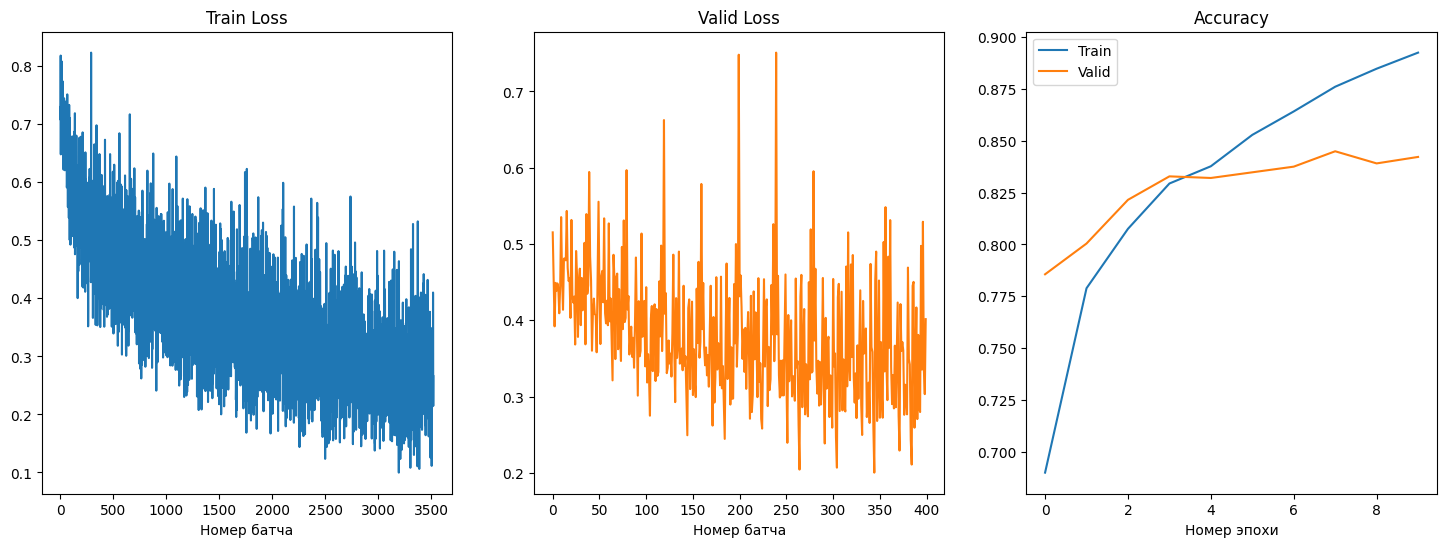

Номер эпохи: 10 | Время обучения эпохи: 2m 52s


In [ ]:
INPUT_DIM = len(vocab)    # размер словаря
EMBEDDING_DIM = 100       # размерность векторов-эмбеддингов
N_FILTERS = 100           # количество свёрточных фильтров
FILTER_SIZES = [3, 4, 5]  # размеры фильтров на каждом уровне
OUTPUT_DIM = 1            # размерность выхода (сеть выдаёт вероятность для одного класса)
DROPOUT = 0.5             # вероятность dropout
PAD_IDX = UNK_IDX         # id токена для паддинга

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)
optimizer, criterion = torch.optim.Adam(model.parameters()), nn.BCEWithLogitsLoss().to(device)
training_loop(model, optimizer, criterion)

Посчитайте качество модели на тестовой выборке.

In [ ]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
torch.save(model.state_dict(), 'baseline.pt')
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.341 | Test Acc: 85.34%


*Вывод: получилось, что со стеммингом качество немного упало (акьюраси 85.34% сейчас против 87.47% на семинаре). Возможно, стоило повысить число эпох, или подобрать другие гиперпараметры. Возможно также, что стемминг не помог конкретно в этой задаче, но сработает в другой (например, где датасет побольше).*

__2. Изменение размера эмбеддинга__

Уменьшите размер эмбеддингов до 30. Как поменялось качество модели? 

*Замечание.* Если в предыдущем пункте вы перезаписали датасеты, применив к ним стемминг или лемматизацию, то их нужно скачать заново. Обратите внимание также на используемый словарь. 

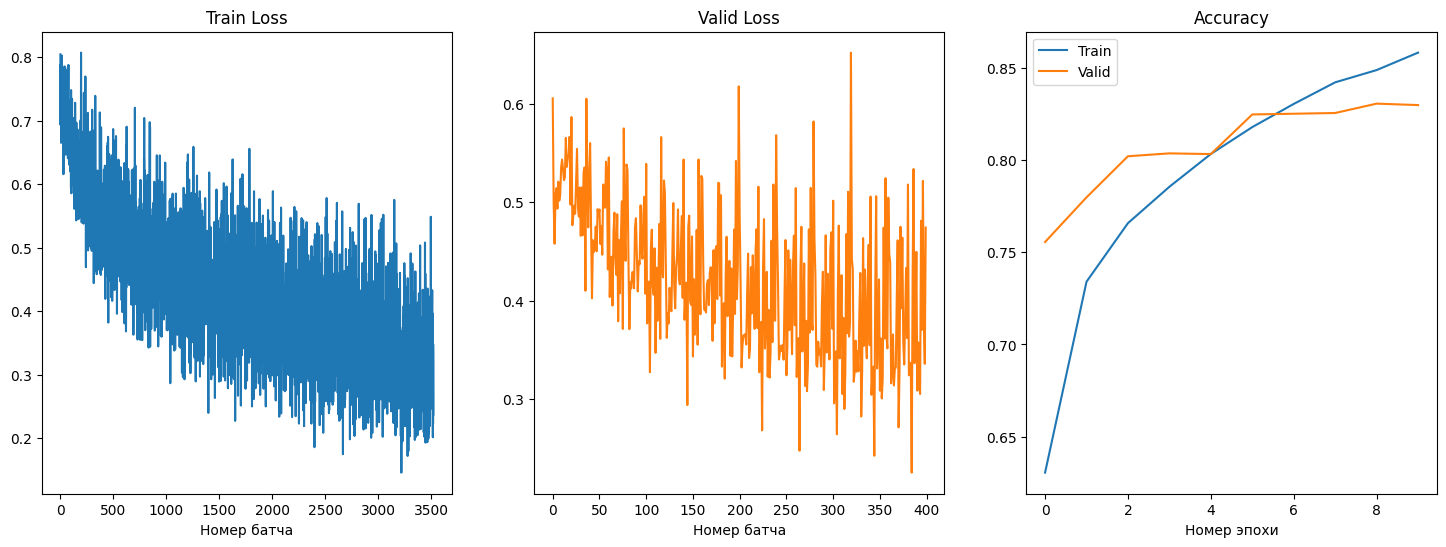

Номер эпохи: 10 | Время обучения эпохи: 1m 25s


In [ ]:
EMBEDDING_DIM = 30
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)
optimizer, criterion = torch.optim.Adam(model.parameters()), nn.BCEWithLogitsLoss().to(device)
training_loop(model, optimizer, criterion)

In [ ]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.363 | Test Acc: 83.81%


Теперь  увеличьте размер эмбеддингов до 200. Как поменялось качество модели в сравнении с предыдущей? Какая модель более склонна к переобучению и почему?

Сделайте выводы.

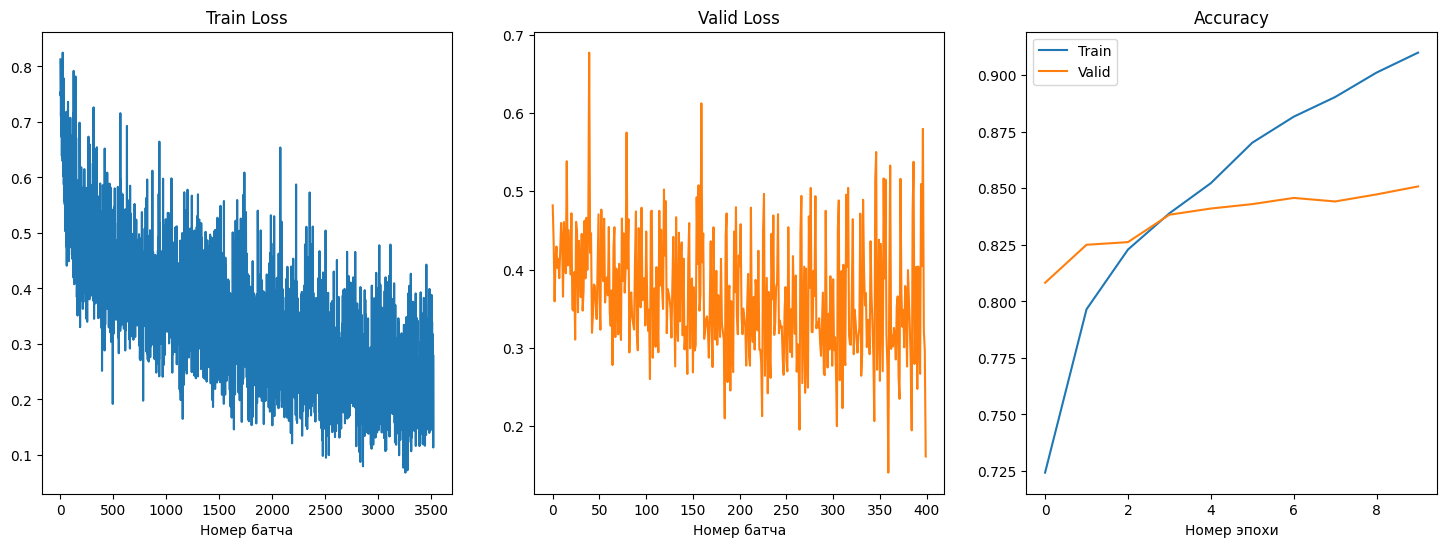

Номер эпохи: 10 | Время обучения эпохи: 4m 46s


In [ ]:
EMBEDDING_DIM = 200
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)
optimizer, criterion = torch.optim.Adam(model.parameters()), nn.BCEWithLogitsLoss().to(device)
training_loop(model, optimizer, criterion)

In [ ]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.339 | Test Acc: 85.60%


In [ ]:
EMBEDDING_DIM = 100  # вернем в исходное состояние

*Выводы: с EMBEDDING_DIM=30 точность модели упала на пару проц.пунктов, а с EMBEDDING_DIM=200 - даже немного выросла (на <1 проц.пункта). Более склонна к переобучению модель с EMBEDDING_DIM=200, потому что она обладает бОльшим числом параметров, то есть потенциально может выучить более сложную зависимость или вызубрить шум*

__3. Нахождение близких слов по эмбеддингам.__

Напишите функцию, считающую [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) между двумя векторами. Именно косинусная мера близости очень часто используется в качестве меры схожести двух эмбеддинг-векторов.

In [ ]:
def cosine_similarity(a, b):
    return a@b / (np.sqrt(a@a * b@b) + 1e-9)  # так знаменатель не занулится

Напишите функцию, которая принимает на вход слово word и $k$ и возвращает $k$ наиболее похожих на word слов. 

Эмбеддинги для каждого слова должны быть получены с помощью матрицы эмбеддингов из Embedding слоя вашей модели. В качестве модели возьмите модель из предыдущего пункта с маленьким размером эмбеддинга. 

Чтобы по слову получить его индекс в словаре и обратно можно воспользоваться методами: `lookup_indices` и `lookup_token`. Подробнее про эти методы можно посмотреть в [документации](https://pytorch.org/text/stable/vocab.html) используемеого `torchtext`'a.



In [ ]:
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)
model.load_state_dict(torch.load("baseline.pt"))  # embedding возьмем от бейзлайновой модели (для корректности всех сравнений)

def find_most_similar(word, k):
    a = model.embedding(torch.tensor(vocab.lookup_indices([word])[0])).detach()
    sim = []
    for i in range(len(vocab)):
        b = model.embedding(torch.tensor(i)).detach()
        sim.append((vocab.lookup_token(i), round(cosine_similarity(a,b).item(),3)))
    return sorted(sim, key=lambda x:x[1], reverse=True)[1:k+1]

Выберите несколько слов из словаря и посмотрите на их ближайшие по эмбеддингу 5 слов.

In [ ]:
find_most_similar('great', 5)

[('swim', 0.423),
 ('package', 0.395),
 ('medal', 0.395),
 ('rendezvous', 0.38),
 ('delinquent', 0.376)]

In [ ]:
find_most_similar('drama', 5)

[('swayed', 0.381),
 ('Farrah', 0.347),
 ('Detmers', 0.342),
 ('hugging', 0.339),
 ('applies', 0.331)]

In [ ]:
find_most_similar('wife', 5)

[('commands', 0.358),
 ('pitiable', 0.358),
 ('real', 0.356),
 ('mise', 0.351),
 ('anachronisms', 0.351)]

*Вывод: работает довольно плохо. Видимо, нужен эмбеддинг от нейросети большего качества (например, обученной на большем датасете)*

__4. Эксперементы со свёртками.__

Обучите модель с фильтрами меньших размеров: 1, 2 и 3. Измерьте ее качество и подумайте как наилучшим образом изобразить результаты.

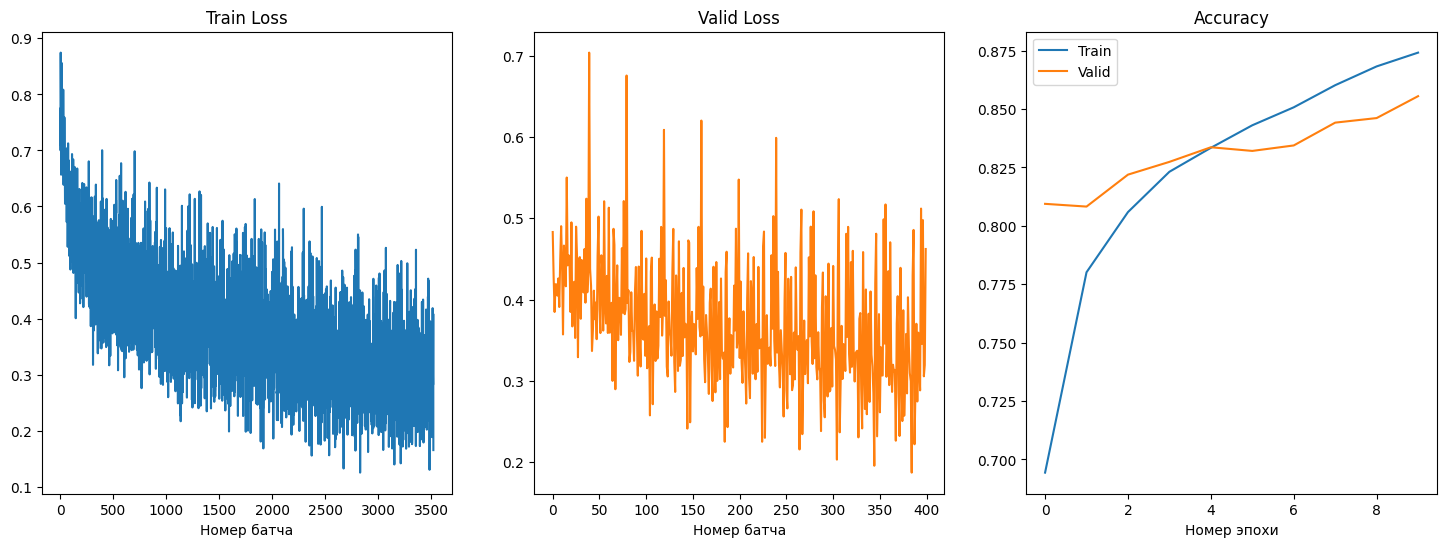

Номер эпохи: 10 | Время обучения эпохи: 2m 4s


In [ ]:
FILTER_SIZES = [1, 2, 3]
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)
optimizer, criterion = torch.optim.Adam(model.parameters()), nn.BCEWithLogitsLoss().to(device)
training_loop(model, optimizer, criterion)

In [ ]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.336 | Test Acc: 85.24%


Теперь рассмотрим лишь фильтры размера 1 и 2.

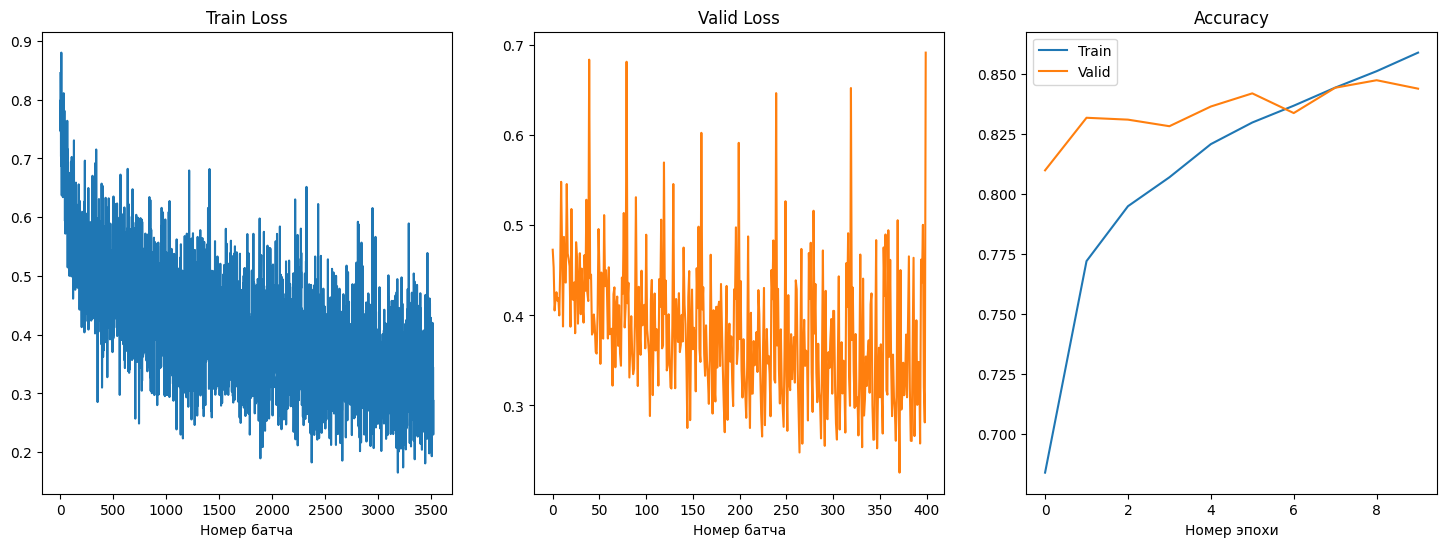

Номер эпохи: 10 | Время обучения эпохи: 1m 18s


In [ ]:
FILTER_SIZES = [1, 2]
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)
optimizer, criterion = torch.optim.Adam(model.parameters()), nn.BCEWithLogitsLoss().to(device)
training_loop(model, optimizer, criterion)

In [ ]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.344 | Test Acc: 84.97%


In [ ]:
FILTER_SIZES = [3, 4, 5]  # вернем в исходное состояние

Сильно ли меняется качество модели для данной задачи? Почему?

*Выводы: при изменении фильтров качество модели почти не меняется (всё в пределах 1 проц.пункта). Возможно, это объясняется слишком маленьким датасетом, и эффект слишком слаб*

__5. Аугментация данных.__

Попробуйте сделать аугментацию текста. 

Замените слово на синоним с некоторой вероятностью $p$. То есть с вероятностью $p$ каждое слово будет заменено на некоторый его синоним, а с вероятностью $1 - p$ слово останется как есть.

Обучите модель на таких данных и посмотрите на качество.

In [ ]:
def aug(texts, p=0.2):  # аугментация
    aug_texts = []
    for t in texts:
        aug_t = []
        coins = bern(p).rvs(size=len(t))
        for w,coin in zip(t,coins):  # каждое слово каждого текста
            if coin:  # меняем на синоним с вер.-тью р
                synsets = wordnet.synsets(vocab.lookup_token(w))
                if synsets:  # если синоним вообще нашли
                    w = vocab.lookup_indices([synsets[0].lemma_names()[0]])[0]
            aug_t.append(w)
        aug_texts.append(aug_t)
    return torch.tensor(aug_texts, dtype=torch.long)  # Ensure proper dtype

def train(model, iterator, optimizer, criterion, loss_history):
    """Обучение модели"""
    epoch_loss, epoch_acc = 0, 0
    model.train()
    for batch_id, batch in enumerate(iterator):
        optimizer.zero_grad()  # чтобы градиент не накапливался, его нужно обнулить
        texts, labels = batch

        texts = aug(texts)  # аугментация

        predictions = model(texts).squeeze(1)
        loss, acc = criterion(predictions, labels), binary_accuracy(predictions, labels)
        loss.backward()  # сделаем back-propagation для подсчёта градиентов
        optimizer.step()  # выполним шаг оптимизатора
        epoch_loss, epoch_acc = epoch_loss+loss.item(), epoch_acc+acc.item()  # обновим метрики
        loss_history.append(loss.item())
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def training_loop(model_instance, optimizer, criterion, n_epochs=10):
    """Цикл обучения нейросети"""
    best_valid_loss = float('inf')
    loss_history, val_loss_history, acc_history, val_acc_history = [], [], [], []
    for epoch in range(n_epochs):
        start_time = time.time()
        train_loss, train_acc = train(model_instance, train_loader, optimizer, criterion, loss_history)
        acc_history.append(train_acc)
        valid_loss, valid_acc = evaluate(model_instance, valid_loader, criterion, val_loss_history)
        val_acc_history.append(valid_acc)
        end_time = time.time()
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        clear_output(True)  # Отобразим графики loss'ов
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.plot(loss_history)
        plt.title("Train Loss")
        plt.xlabel("Номер батча")
        plt.subplot(1, 3, 2)
        plt.plot(val_loss_history, color="tab:orange")
        plt.title("Valid Loss")
        plt.xlabel("Номер батча")
        if valid_loss < best_valid_loss:  # Если значение функции потерь улучшилось, сохраним параметры модели
            best_valid_loss = valid_loss
            torch.save(model_instance.state_dict(), 'model_checkpoint.pt')
        plt.subplot(1, 3, 3)  # Отрисуем значение точности от эпохи
        plt.plot(acc_history, label="Train")
        plt.plot(val_acc_history, label="Valid")
        plt.legend()
        plt.title("Accuracy")
        plt.xlabel("Номер эпохи")
        plt.show()
        print(f"Номер эпохи: {epoch+1:02} | Время обучения эпохи: {epoch_mins}m {epoch_secs}s")

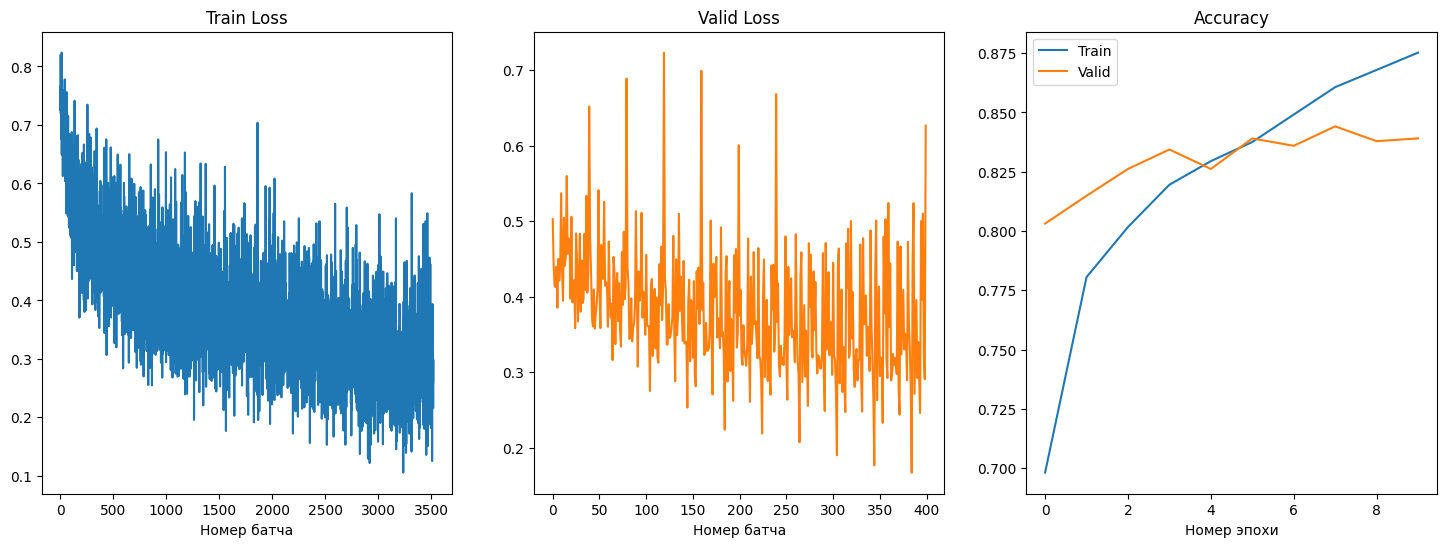

Номер эпохи: 10 | Время обучения эпохи: 5m 35s


In [ ]:
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX).to(device)
optimizer, criterion = torch.optim.Adam(model.parameters()), nn.BCEWithLogitsLoss().to(device)
training_loop(model, optimizer, criterion)

In [ ]:
model.load_state_dict(torch.load("model_checkpoint.pt"))
test_loss, test_acc = evaluate(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%")

Test Loss: 0.336 | Test Acc: 85.32%


*Вывод: качество почти не поменялось. Кажется, стоит усилить аугментацию (поставить p > 0.2)*